# Monte Carlo Integration

We learned in class about Monte Carlo Integration and in particular computed a similar integral
to this one

$$I= \int\limits_{-1}^{1} e^{-x^2} dx \approx 1.49365 $$

##### a) Plot the function in that interval and using the Monte Carlo method described in class, compute that integral for N = 10000. What value do you get?


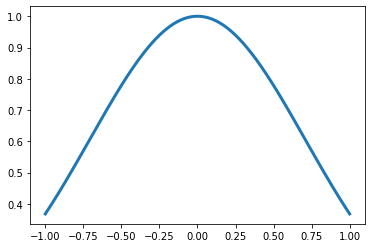

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = np.linspace(-1,1,10000)

f = lambda x: np.exp(-x**2)

plt.figure()
plt.plot(x, f(x), linewidth=3)
plt.show()

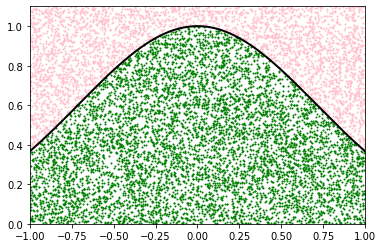

1.5008400000000002

In [16]:
N = 10000


rec_x = [-1,1]
rec_y = [0,1.1]
# Sample from uniform distribution
mc_x = np.random.uniform(min(rec_x), max(rec_x), N)
mc_y = np.random.uniform(min(rec_y), max(rec_y), N)

# Define the points under the curve
points_under = [True if mc_y[i] <= f(mc_x[i]) else False 
                for i in range(len(mc_x))]

# Plot the points
plt.figure()
plt.plot(x, f(x), linewidth=2, c='k')
plt.scatter(mc_x[points_under], mc_y[points_under],
           c='green', s=1)
plt.scatter(mc_x[np.logical_not(points_under)], 
            mc_y[np.logical_not(points_under)], 
            c='pink', s=1)
plt.xlim(rec_x)
plt.ylim(rec_y)
plt.show()

# Calculate integral
integral = ((max(rec_x) - min(rec_x)) * 
            (max(rec_y) - min(rec_y)) * sum(points_under) / N)
primero=integral
primero


##### b) What is the error of this method? How do you compute it?

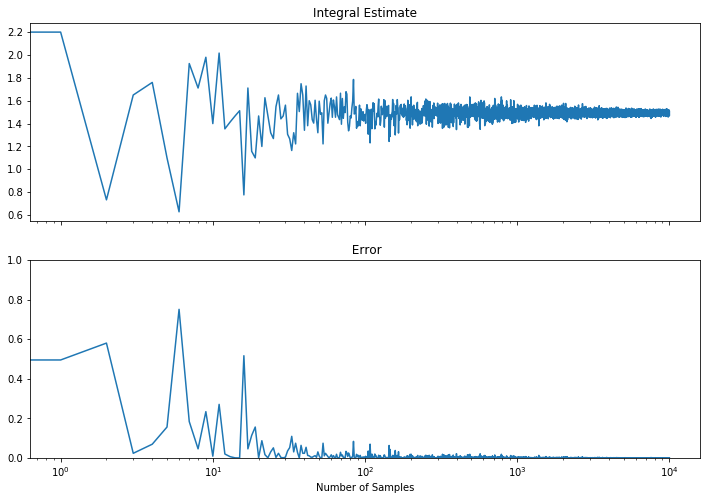

In [18]:

# Define number of samples
N = np.arange(1, 10000)

# Define rectangle boundaries
rec_x = [-1, 1]
rec_y = [0, 1.1]

int_approx = []
error = []
actual_value = primero
# Define the points under the curve
for n in N:
    # Sample from uniform distribution
    mc_x = np.random.uniform(min(rec_x), max(rec_x), n)
    mc_y = np.random.uniform(min(rec_y), max(rec_y), n)
    
    points_under = [True if mc_y[i] <= f(mc_x[i]) else False 
                for i in range(n)]
    # Calculate integral
    integral = ((max(rec_x) - min(rec_x)) * 
            (max(rec_y) - min(rec_y)) * sum(points_under) / n)
    int_approx.append(integral)
    
    # Calculate error
    error.append(np.power(integral - actual_value, 2))

    

fig, ax = plt.subplots(2, sharex=True, figsize=(12,8))
ax[0].plot(int_approx)
ax[0].set_title("Integral Estimate")

ax[1].plot(error)
ax[1].set_title(" Error")
ax[1].set_xlabel("Number of Samples")
ax[1].set_ylim([0, 1])
plt.xscale('log')
plt.show()


#### c) Compare the error found with other approaches, like the midpoint , trapezoidal, quadratures, Simpson, etc. Is this method better or worst? If the integral were in eight dimensions, which method would be better? Prove it.

Metodo de Simpson 3/8

In [31]:
def f(x):
    return np.exp(-x**2)

In [32]:
def simpson(f,a,b):
    m1=(2*a+b)/3
    m2=(a+2*b)/3
    integ=(b-a)/8* (f(a)+3*f(m1)+3+f(m2)+f(b))
    return integ

In [37]:
a=-1
b=1
N=10000
h=(b-a)/N
suma=0
for i in range(N):
    b=a+h
    area=simpson(f,a,b)
    suma=suma+area
    a=b

print (suma)
vt=primero
errorSimpson= abs((vt-suma)/vt)
errorSimpson

1.8702361988097862


0.25034176069327446

El error es muy grade adirencia del metodo de monte Carlo, un error de mas del $25%$, ya es muy grande por lo tanto en este caso es mejor el metodo de simpson $\frac{1}{8}$